# Recommendation system

### Installation of Libraries

In [1]:
!pip install pandas
!pip install matplotlib
!pip install xlrd==1.2.0
!pip install openpyxl
!pip install scipy
!pip install seaborn
!pip install scikit-learn
!pip install numpy
!pip install tensorflow
!pip install scikit-surprise==1.1.3

In [2]:
import pandas as pd
import numpy as np
import re as re
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from scipy.sparse import csr_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
# use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib as mpl

mpl.style.use('ggplot')  # optional: for ggplot-like style
# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.7.1


### Data understanding

### Read customers

In [3]:
customers = pd.read_json(r'C:\Users\Chidera\Documents\data\customers.json')
print(customers.shape)
customers.head()

(678, 2)


,Id,NickName
0,103603,1000kgthanh
1,103760,999999999ok
2,103829,ac7ive
3,1,admin
4,103839,ahkk.nguyen


### Read products

In [4]:
products = pd.read_json(r'C:\Users\Chidera\Documents\data\products.json')
print(products.shape)
products.head()

(691, 3)


,Id,Name,UnitPrice
0,1,Build your own computer,1200.0
1,2,Digital Storm VANQUISH 3 Custom Performance PC,1259.0
2,3,Lenovo IdeaCentre 600 All-in-One PC,500.0
3,4,Apple MacBook Pro 13-inch,1800.0
4,5,Asus N551JK-XO076H Laptop,1500.0


### Read ratings

In [5]:
ratings = pd.read_json(r'C:\Users\Chidera\Documents\data\ratings.json')
print(ratings.shape)
ratings.head()

(130754, 4)


,CustomerID,ProductID,Rate,CreateDate
0,103416,619,1,2018/01/01 01:36:30
1,103654,411,1,2018/01/01 01:36:35
2,103954,298,3,2018/01/01 01:36:38
3,103672,361,5,2018/01/01 01:37:15
4,103960,536,5,2018/01/01 02:36:25


### Data description

In [6]:
ratings.head()

,CustomerID,ProductID,Rate,CreateDate
0,103416,619,1,2018/01/01 01:36:30
1,103654,411,1,2018/01/01 01:36:35
2,103954,298,3,2018/01/01 01:36:38
3,103672,361,5,2018/01/01 01:37:15
4,103960,536,5,2018/01/01 02:36:25


In [7]:
ratings.shape

(130754, 4)

In [8]:
ratings.dtypes

CustomerID     int64
ProductID      int64
Rate           int64
CreateDate    object
dtype: object

In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130754 entries, 0 to 130753
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   CustomerID  130754 non-null  int64 
 1   ProductID   130754 non-null  int64 
 2   Rate        130754 non-null  int64 
 3   CreateDate  130754 non-null  object
dtypes: int64(3), object(1)
memory usage: 4.0+ MB


### Data cleaning

In [10]:
#Five point summary 
ratings.describe()['Rate'].T

count    130754.000000
mean          3.188598
std           1.515812
min           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: Rate, dtype: float64

In [11]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(ratings.Rate.min()))
print('Maximum rating is: %d' %(ratings.Rate.max()))

Minimum rating is: 1
Maximum rating is: 5


In [12]:
#Check for missing values
print('Number of missing values across columns: \n',ratings.isnull().sum())

Number of missing values across columns: 
 CustomerID    0
ProductID     0
Rate          0
CreateDate    0
dtype: int64


### Dropping the TimeStamp Column

In [15]:
#Dropping the Timestamp column
ratings.drop(['CreateDate'], axis=1,inplace=True)

In [16]:
ratings.head()

,CustomerID,ProductID,Rate
0,103416,619,1
1,103654,411,1
2,103954,298,3
3,103672,361,5
4,103960,536,5


### Handling duplicates

In [17]:
temp_df =ratings.append(ratings)
temp_df.shape

C:\Users\Chidera\AppData\Local\Temp\ipykernel_15352\849576993.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df =ratings.append(ratings)


(261508, 3)

In [18]:
temp_df = temp_df.drop_duplicates()
temp_df.shape

(123840, 3)

In [19]:
# Select duplicate row based on all columns by deleting one of the duplicate 
df2 = ratings[ratings.duplicated()]
df2

,CustomerID,ProductID,Rate
950,103820,162,5
1063,103367,351,5
1508,103765,336,5
1662,103320,332,5
1765,103907,79,1
...,...,...,...
130736,103907,129,1
130739,103907,624,1
130742,103907,163,1
130746,103907,47,1


In [20]:
# Select duplicate row based on all columns without deleting  any one of the duplicate 
df2 = ratings[ratings.duplicated(keep=False)]
df2

,CustomerID,ProductID,Rate
13,103651,388,5
15,103672,52,5
20,103544,62,5
40,103765,523,5
55,6,258,1
...,...,...,...
130736,103907,129,1
130739,103907,624,1
130742,103907,163,1
130746,103907,47,1


### Deleting duplicate using the all column

In [21]:
ratings = ratings.drop_duplicates()
ratings

,CustomerID,ProductID,Rate
0,103416,619,1
1,103654,411,1
2,103954,298,3
3,103672,361,5
4,103960,536,5
...,...,...,...
130749,103907,501,1
130750,103907,200,1
130751,103907,184,1
130752,103907,211,1


#### Pearson Correlation

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

1: Perfect positive linear correlation.
0: No linear correlation, the two variables most likely do not affect each other.
-1: Perfect negative linear correlation.
Pearson Correlation is the default method of the function "corr". Like before, we can calculate the Pearson Correlation of the of the 'int64' or 'float64' variables.

In [13]:
ratings.corr()

C:\Users\Chidera\AppData\Local\Temp\ipykernel_15352\1007000214.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ratings.corr()


,CustomerID,ProductID,Rate
CustomerID,1.000000,0.004497,0.045776
ProductID,0.004497,1.000000,-0.000463
Rate,0.045776,-0.000463,1.000000


C:\Users\Chidera\AppData\Local\Temp\ipykernel_15352\2914166996.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ratings.corr(), annot=True)


<Axes: >

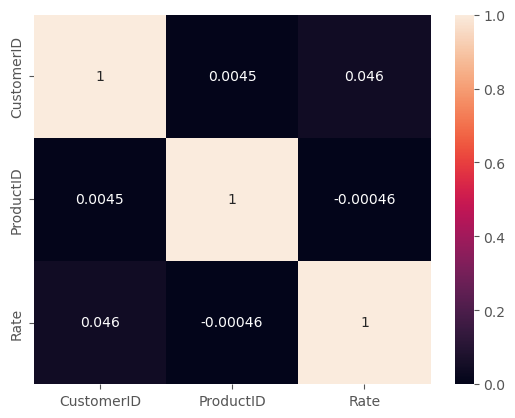

In [14]:
sns.heatmap(ratings.corr(), annot=True)

### Data Exploration and Visualization

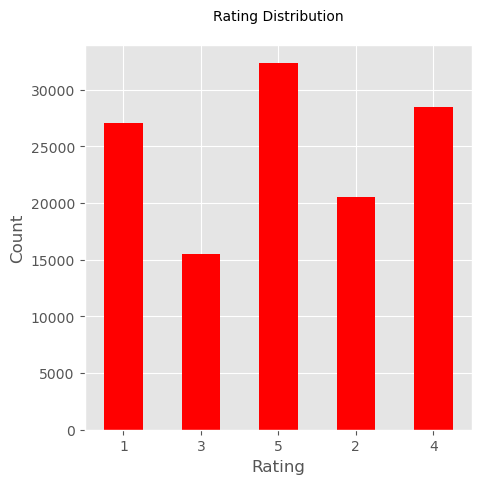

In [151]:
plt.rc("font",size=10)
ratings.Rate.value_counts(sort=False).plot(kind='bar', figsize=(5, 5), rot=0, color='red')
plt.title('Rating Distribution\n', fontsize=10)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


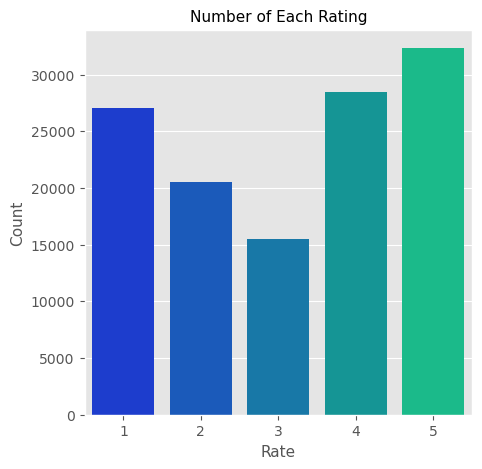

In [24]:
plt.figure(figsize=(5,5))
sns.countplot(x='Rate', data=ratings, palette='winter')
plt.xlabel('Rate', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Number of Each Rating', fontsize=11)
plt.show()

### Unique customers and products

In [25]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",ratings.shape[0])
print("Total No of Users   :", len(np.unique(ratings.CustomerID)))
print("Total No of products  :", len(np.unique(ratings.ProductID)))

Total data 
--------------------------------------------------

Total no of ratings : 123840
Total No of Users   : 344
Total No of products  : 691


### Analysis of rating given by the user

In [26]:
no_of_rated_products_per_user = ratings.groupby(by='CustomerID')['Rate'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

CustomerID
103996    1202
103505    1143
103367    1099
103873    1054
103707    1050
Name: Rate, dtype: int64

In [27]:
no_of_rated_products_per_user.describe()

count     344.000000
mean      360.000000
std       230.552183
min       100.000000
25%       195.000000
50%       278.000000
75%       458.250000
max      1202.000000
Name: Rate, dtype: float64

In [28]:
quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

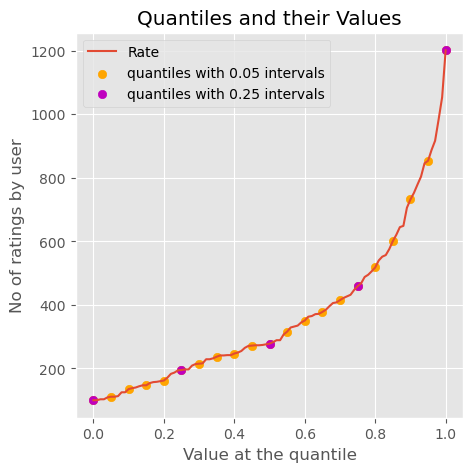

In [29]:
plt.figure(figsize=(5,5))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [30]:
df_rating=pd.DataFrame({'Number of Rating':ratings.groupby('ProductID').count()['Rate'],
                        'Mean Rating':ratings.groupby('ProductID').mean()['Rate']})

In [31]:
df_rating.head()

,Number of Rating,Mean Rating
ProductID,,
1,187,3.229947
2,189,3.037037
3,192,3.182292
4,176,3.318182
5,189,3.259259


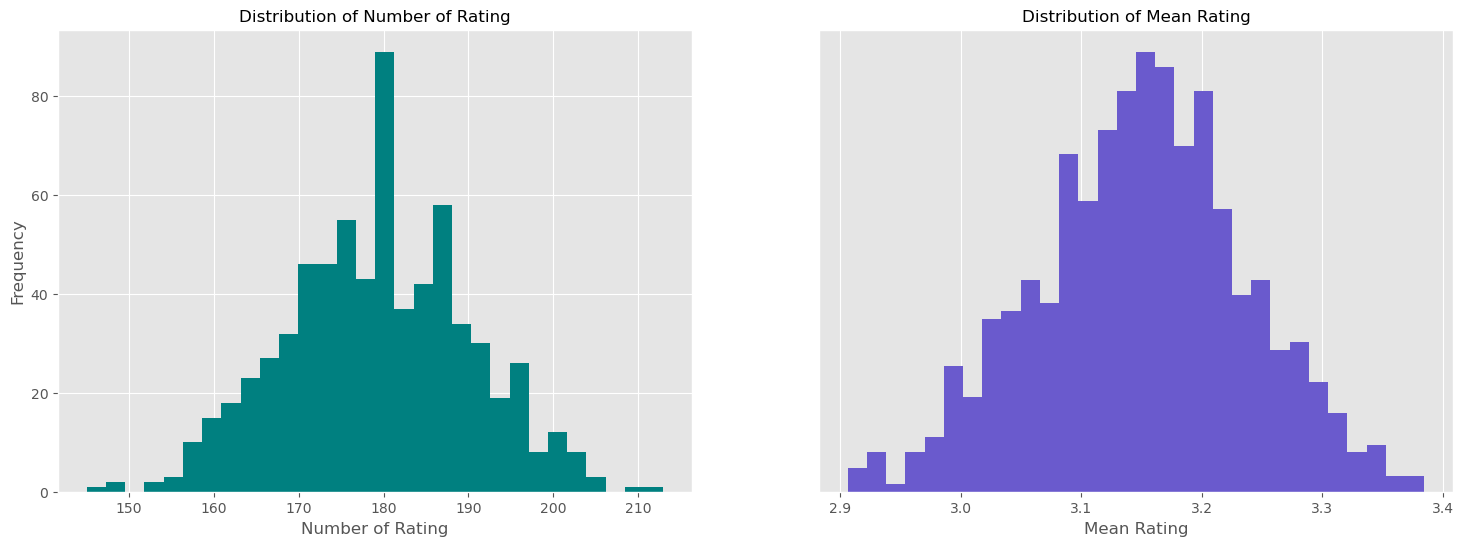

In [32]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.hist(x='Number of Rating',data=df_rating,bins=30,color='teal')
plt.title('Distribution of Number of Rating', fontsize=12)
plt.xlabel('Number of Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1,2,2)
plt.hist(x='Mean Rating',data=df_rating,bins=30, color='slateblue')
plt.title('Distribution of Mean Rating', fontsize=12)
plt.xlabel('Mean Rating', fontsize=12)
plt.yticks([])
plt.show()

In [33]:
# Split the data into training and test sets
X_train, X_test = train_test_split(ratings, test_size=0.2, random_state=42)

In [34]:
# Calculate the sparsity of the train, validation & test rating matrices
def calc_sparsity(label, ratings):
    sparsity = float(len(ratings.nonzero()[0]))
    sparsity /= (ratings.shape[0] * ratings.shape[1])
    sparsity *= 100
    print('{:s} Sparsity: {:4.2f}%'.format(label, sparsity))

### Autoencoder model

### Simple autoencoder

###### Step 1: getting the dataset into required  form for modelling

In [36]:
# Create user-item interaction matrix (sparse matrix)
interaction_matrix = pd.pivot_table(ratings, index='CustomerID', columns='ProductID', values='Rate', fill_value=0)

In [37]:
interaction_matrix

ProductID,1,2,3,4,5,6,7,8,9,10,...,682,683,684,685,686,687,688,689,690,691
CustomerID,,,,,,,,,,,,,,,,,,,,,
3,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,1.0,1.0,1.0,1.000000,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
13874,5.0,0.0,5.0,0.000000,4.0,0.0,0.0,3.0,5.0,5.0,...,3.5,4.0,4.0,0.0,5.0,0.0,0.0,4.0,3.0,5.0
13879,0.0,3.5,2.0,0.000000,2.0,0.0,0.0,0.0,0.0,3.5,...,5.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
13885,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,4.0,0.0,4.0,...,4.0,0.0,4.0,4.0,4.0,0.0,0.0,4.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103988,0.0,0.0,0.0,5.000000,0.0,0.0,0.0,0.0,0.0,5.0,...,5.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0
103991,0.0,0.0,0.0,2.000000,5.0,2.0,0.0,2.0,0.0,5.0,...,2.0,0.0,0.0,3.5,2.0,0.0,0.0,0.0,0.0,0.0
103992,0.0,0.0,0.0,4.000000,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,4.0


In [38]:
# Convert the interaction matrix to a NumPy array
X = interaction_matrix.values


In [39]:
# Normalize the ratings to a range of 0 to 1 (if needed)
max_rating = np.max(X)
X = X / max_rating

In [40]:
# Split the data into training and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [41]:
# Autoencoder model architecture
input_shape = X_train.shape[1]  # Number of items
latent_dim = 32  # Number of latent dimensions for user and item embeddings


###### Step 2: training the model

In [42]:
# Encoder
input_layer = Input(shape=(input_shape,))
encoder = Dense(latent_dim, activation='relu')(input_layer)

# Decoder
decoder = Dense(input_shape, activation='sigmoid')(encoder)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the model
autoencoder.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

In [43]:
# Train the model
epochs = 50
batch_size = 64
simple_autoencoder = autoencoder.fit(X_train, X_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/50
4/4 [==============================] - 1s 72ms/step - loss: 0.1849 - val_loss: 0.1763
Epoch 2/50
4/4 [==============================] - 0s 10ms/step - loss: 0.1825 - val_loss: 0.1750
Epoch 3/50
4/4 [==============================] - 0s 13ms/step - loss: 0.1801 - val_loss: 0.1738
Epoch 4/50
4/4 [==============================] - 0s 13ms/step - loss: 0.1769 - val_loss: 0.1734
Epoch 5/50
4/4 [==============================] - 0s 14ms/step - loss: 0.1744 - val_loss: 0.1735
Epoch 6/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1718 - val_loss: 0.1726
Epoch 7/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1695 - val_loss: 0.1711
Epoch 8/50
4/4 [==============================] - 0s 13ms/step - loss: 0.1674 - val_loss: 0.1707
Epoch 9/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1657 - val_loss: 0.1708
Epoch 10/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1634 - val_loss: 0.1694
Epoch 11/50
4/4 [============

###### Step 3: Using the model for recommendation

In [44]:
# Create the encoder model
encoder_model = Model(inputs=input_layer, outputs=encoder)
# Get item embeddings from the trained autoencoder weights
item_embeddings = encoder_model.get_weights()[0]

In [45]:
# Function to get user embeddings
def get_user_embedding(user_id):
    user_embedding = encoder_model.predict(X_train[user_id:user_id + 1])
    return user_embedding

In [46]:
# Function to get recommended items for a given user
def get_recommendations(user_embedding, n=5):
    # Compute the similarity between the user and all items using dot product
    similarity_scores = np.dot(item_embeddings, user_embedding.T)
    # Sort items based on similarity scores and get top-N recommended items
    top_n_items = np.argsort(similarity_scores, axis=0)[::-1][:n]
    return top_n_items

In [47]:
# Example: Get top 5 recommended items for user with user_id=0
user_id = 3
user_embedding = get_user_embedding(user_id)
recommended_items = get_recommendations(user_embedding, n=5)
print(recommended_items)

1/1 [==============================] - 0s 71ms/step
[[191]
 [150]
 [404]
 [214]
 [139]]


###### Step 4: ploting the loss graph

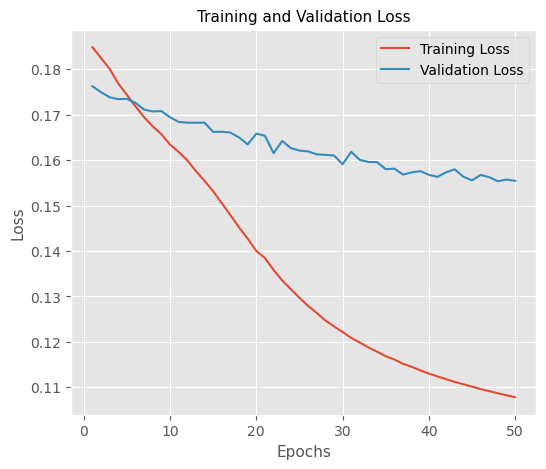

In [154]:
# Access the loss values from the history object
loss = simple_autoencoder.history['loss']

# Access the validation loss values (if applicable)
val_loss = simple_autoencoder.history['val_loss']

# Plot the loss and MSE curves
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(6, 5))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=11)
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Loss', fontsize=11)
plt.legend()
plt.show()

###### Step 5: Evaluting the model

In [49]:
# Compute RMSE for simple autoencoder
simple_autoencoder_rmse = np.sqrt(np.mean((X_test - autoencoder.predict(X_test))**2))
# Compute MSE for simple autoencoder
simple_autoencoder_mse = mean_squared_error(X_test, autoencoder.predict(X_test))
# Compute MAE for a simple autoencoder
simple_autoencoder_mae = np.mean(np.abs(X_test - autoencoder.predict(X_test)))

3/3 [==============================] - 0s 2ms/step


In [50]:
print("Simple Autoencoder MSE:", simple_autoencoder_mse)
print("Simple Autoencoder RMSE:", simple_autoencoder_rmse)
# Print the MAE
print("Mean Absolute Error (MAE):", simple_autoencoder_mae)

Simple Autoencoder MSE: 0.14602002795777683
Simple Autoencoder RMSE: 0.3821256703726888
Mean Absolute Error (MAE): 0.3414417321122829


### Deep Autoencoder

###### Step 1: getting the dataset into required  form for modelling

In [77]:
# Create user-item interaction matrix (sparse matrix)
interaction_matrix = pd.pivot_table(ratings, index='CustomerID', columns='ProductID', values='Rate', fill_value=0)

In [78]:
interaction_matrix

ProductID,1,2,3,4,5,6,7,8,9,10,...,682,683,684,685,686,687,688,689,690,691
CustomerID,,,,,,,,,,,,,,,,,,,,,
3,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,1.0,1.0,1.0,1.000000,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
13874,5.0,0.0,5.0,0.000000,4.0,0.0,0.0,3.0,5.0,5.0,...,3.5,4.0,4.0,0.0,5.0,0.0,0.0,4.0,3.0,5.0
13879,0.0,3.5,2.0,0.000000,2.0,0.0,0.0,0.0,0.0,3.5,...,5.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
13885,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,4.0,0.0,4.0,...,4.0,0.0,4.0,4.0,4.0,0.0,0.0,4.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103988,0.0,0.0,0.0,5.000000,0.0,0.0,0.0,0.0,0.0,5.0,...,5.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0
103991,0.0,0.0,0.0,2.000000,5.0,2.0,0.0,2.0,0.0,5.0,...,2.0,0.0,0.0,3.5,2.0,0.0,0.0,0.0,0.0,0.0
103992,0.0,0.0,0.0,4.000000,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,4.0


In [79]:
# Convert the interaction matrix to a NumPy array
X = interaction_matrix.values

In [80]:
# Normalize the ratings to a range of 0 to 1 (if needed)
max_rating = np.max(X)
X = X / max_rating

In [81]:
# Split the data into training and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [82]:
# Autoencoder model architecture
input_shape = X_train.shape[1]  # Number of items
latent_dim = 32  # Number of latent dimensions for user and item embeddings

###### Step 2: training the model

In [83]:
# Encoder
input_layer = Input(shape=(input_shape,))
encoder_layer_1 = Dense(128, activation='relu')(input_layer)
encoder_layer_2 = Dense(64, activation='relu')(encoder_layer_1)
encoder = Dense(latent_dim, activation='relu')(encoder_layer_2)

In [84]:
# Decoder
decoder_layer_1 = Dense(64, activation='relu')(encoder)
decoder_layer_2 = Dense(128, activation='relu')(decoder_layer_1)
decoder = Dense(input_shape, activation='sigmoid')(decoder_layer_2)

In [85]:
# Autoencoder model
deep_auto = Model(inputs=input_layer, outputs=decoder)

In [86]:
# Compile the model
deep_auto.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

In [87]:
# Train the model
epochs = 50
batch_size = 64
deep_autoencoder = deep_auto.fit(X_train, X_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/50
4/4 [==============================] - 1s 45ms/step - loss: 0.1843 - val_loss: 0.1759
Epoch 2/50
4/4 [==============================] - 0s 15ms/step - loss: 0.1813 - val_loss: 0.1730
Epoch 3/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1755 - val_loss: 0.1714
Epoch 4/50
4/4 [==============================] - 0s 18ms/step - loss: 0.1693 - val_loss: 0.1679
Epoch 5/50
4/4 [==============================] - 0s 13ms/step - loss: 0.1624 - val_loss: 0.1630
Epoch 6/50
4/4 [==============================] - 0s 14ms/step - loss: 0.1535 - val_loss: 0.1581
Epoch 7/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1425 - val_loss: 0.1476
Epoch 8/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1305 - val_loss: 0.1417
Epoch 9/50
4/4 [==============================] - 0s 13ms/step - loss: 0.1218 - val_loss: 0.1312
Epoch 10/50
4/4 [==============================] - 0s 14ms/step - loss: 0.1162 - val_loss: 0.1259
Epoch 11/50
4/4 [============

###### Step 3: Using the model for recommendation

In [88]:
# Create the encoder model
encoder_model_deep = Model(inputs=input_layer, outputs=encoder)
# Get item embeddings from the trained autoencoder weights
item_embeddings = encoder_model_deep.predict(np.eye(X_train.shape[1]))

22/22 [==============================] - 0s 1ms/step


In [89]:
# Function to get user embeddings
def get_user_embedding(user_id):
    user_embedding = encoder_model_deep.predict(X_train[user_id:user_id + 1])
    return user_embedding

In [90]:
# Function to get recommended items for a given user
def get_recommendations(user_embedding, n=5):
    # Compute the similarity between the user and all items using dot product
    similarity_scores = np.dot(item_embeddings, user_embedding.T)
    # Sort items based on similarity scores and get top-N recommended items
    top_n_items = np.argsort(similarity_scores, axis=0)[::-1][:n]
    return top_n_items

In [91]:
# Example: Get top 5 recommended items for user with user_id=0
user_id = 3
user_embedding = get_user_embedding(user_id)
recommended_items = get_recommendations(user_embedding, n=5)
print(recommended_items)

1/1 [==============================] - 0s 22ms/step
[[ 56]
 [110]
 [454]
 [185]
 [139]]


###### Step 4: ploting the loss graph

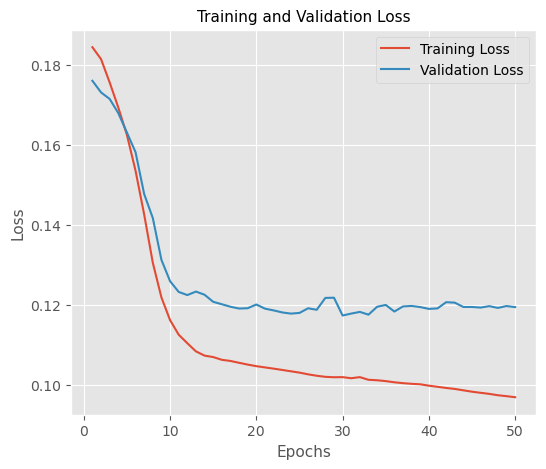

In [155]:
# Access the loss values from the history object
loss = deep_autoencoder.history['loss']
# Access the validation loss values (if applicable)
val_loss = deep_autoencoder.history['val_loss']
# Plot the loss and MSE curves
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(6, 5))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=11)
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Loss', fontsize=11)
plt.legend()
plt.show()

###### Step 5: Evaluting the model

In [93]:
# Compute RMSE for deep autoencoder
deep_autoencoder_rmse = np.sqrt(np.mean((X_test - deep_auto.predict(X_test))**2))
# Compute MSE for deep autoencoder
deep_autoencoder_mse = mean_squared_error(X_test, deep_auto.predict(X_test))
# Compute MAE for a simple autoencoder
deep_autoencode_mae = np.mean(np.abs(X_test - deep_auto.predict(X_test)))

3/3 [==============================] - 0s 2ms/step


In [94]:
# Assuming you have trained the deep autoencoder and simple autoencoder models and got their predictions on the test set
print("Deep Autoencoder RMSE:", deep_autoencoder_rmse)
print("Deep Autoencoder MSE:", deep_autoencoder_mse)
print("Deep Autoencoder MAE:", deep_autoencode_mae)

Deep Autoencoder RMSE: 0.34714014412291083
Deep Autoencoder MSE: 0.12050627966167529
Deep Autoencoder MAE: 0.2972986507555744


### Restricted Boltzmann Machine Model

Now, we can start formatting the data into input for the RBM. We're going to store the normalized users ratings into as a matrix of user-rating called trX, and normalize the values.

###### Step 1: Preparing the dataset to fit the model

In [95]:
user_rating_df = ratings.pivot_table(index='CustomerID', columns='ProductID', values='Rate',aggfunc='first')
user_rating_df.head()

ProductID,1,2,3,4,5,6,7,8,9,10,...,682,683,684,685,686,687,688,689,690,691
CustomerID,,,,,,,,,,,,,,,,,,,,,
3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,...,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0
13874,5.0,NaN,5.0,NaN,4.0,NaN,NaN,3.0,5.0,5.0,...,3.0,5.0,3.0,NaN,5.0,NaN,NaN,3.0,3.0,5.0
13879,NaN,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,...,5.0,NaN,2.0,NaN,NaN,NaN,2.0,NaN,2.0,NaN
13885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,...,4.0,NaN,4.0,4.0,4.0,NaN,NaN,4.0,NaN,4.0


Lets normalize it now:

In [96]:
norm_user_rating_df = user_rating_df.fillna(0) / 5.0
trX = norm_user_rating_df.values
trX[0:5]

array([[0. , 0.2, 0. , ..., 0. , 0. , 0.2],
       [0.2, 0.2, 0.2, ..., 0.2, 0.2, 0.2],
       [1. , 0. , 1. , ..., 0.6, 0.6, 1. ],
       [0. , 0.4, 0.4, ..., 0. , 0.4, 0. ],
       [0. , 0. , 0. , ..., 0.8, 0. , 0.8]])

### Setting the Model's Parameters

In [97]:
hiddenUnits = 20
visibleUnits =  len(user_rating_df.columns)

vb = tf.Variable(tf.zeros([visibleUnits]), tf.float32) #Number of unique movies
hb = tf.Variable(tf.zeros([hiddenUnits]), tf.float32) #Number of features we're going to learn
W = tf.Variable(tf.zeros([visibleUnits, hiddenUnits]), tf.float32)

In [98]:
v0 = tf.zeros([visibleUnits], tf.float32)
#testing to see if the matrix product works
tf.matmul([v0], W)

<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [99]:
#Phase 1: Input Processing
#defining a function to return only the generated hidden states 
def hidden_layer(v0_state, W, hb):
    h0_prob = tf.nn.sigmoid(tf.matmul([v0_state], W) + hb)  #probabilities of the hidden units
    h0_state = tf.nn.relu(tf.sign(h0_prob - tf.random.uniform(tf.shape(h0_prob)))) #sample_h_given_X
    return h0_state

#printing output of zeros input
h0 = hidden_layer(v0, W, hb)
print("first 15 hidden states: ", h0[0][0:15])

def reconstructed_output(h0_state, W, vb):
    v1_prob = tf.nn.sigmoid(tf.matmul(h0_state, tf.transpose(W)) + vb) 
    v1_state = tf.nn.relu(tf.sign(v1_prob - tf.random.uniform(tf.shape(v1_prob)))) #sample_v_given_h
    return v1_state[0]


v1 = reconstructed_output(h0, W, vb)
print("hidden state shape: ", h0.shape)
print("v0 state shape:  ", v0.shape)
print("v1 state shape:  ", v1.shape)

first 15 hidden states:  tf.Tensor([0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0.], shape=(15,), dtype=float32)
hidden state shape:  (1, 20)
v0 state shape:   (691,)
v1 state shape:   (691,)


And set the error function, which in this case will be the Mean Absolute Error Function.

In [102]:
def error(v0_state, v1_state):
    return tf.reduce_mean(tf.square(v0_state - v1_state))

err = tf.reduce_mean(tf.square(v0 - v1))
print("error" , err.numpy())

error 0.5007236


In [103]:

def mean_squared_error(v0_state, v1_state):
    return tf.reduce_mean(tf.square(v0_state - v1_state))

mse = mean_squared_error(v0, v1)
print("Mean Squared Error:", mse.numpy())

Mean Squared Error: 0.5007236


In [104]:
def root_mean_squared_error(v0_state, v1_state):
    mse = tf.reduce_mean(tf.square(v0_state - v1_state))
    return tf.sqrt(mse)

rmse = root_mean_squared_error(v0, v1)
print("Root Mean Squared Error:", rmse.numpy())


Root Mean Squared Error: 0.70761824


Now we train the RBM with 5 epochs with each epoch using a batchsize of 500, giving 12 batches. After training, we print out a graph with the error by epoch.

Epoch: 1 batch #: 0  of 0 sample #: 343 reconstruction error: 0.229175
Epoch: 2 batch #: 0  of 0 sample #: 343 reconstruction error: 0.190101
Epoch: 3 batch #: 0  of 0 sample #: 343 reconstruction error: 0.130767
Epoch: 4 batch #: 0  of 0 sample #: 343 reconstruction error: 0.166946
Epoch: 5 batch #: 0  of 0 sample #: 343 reconstruction error: 0.143502
Epoch: 6 batch #: 0  of 0 sample #: 343 reconstruction error: 0.126425
Epoch: 7 batch #: 0  of 0 sample #: 343 reconstruction error: 0.117164
Epoch: 8 batch #: 0  of 0 sample #: 343 reconstruction error: 0.094009
Epoch: 9 batch #: 0  of 0 sample #: 343 reconstruction error: 0.091114
Epoch: 10 batch #: 0  of 0 sample #: 343 reconstruction error: 0.066223
Epoch: 11 batch #: 0  of 0 sample #: 343 reconstruction error: 0.110217
Epoch: 12 batch #: 0  of 0 sample #: 343 reconstruction error: 0.121505
Epoch: 13 batch #: 0  of 0 sample #: 343 reconstruction error: 0.077511
Epoch: 14 batch #: 0  of 0 sample #: 343 reconstruction error: 0.080984
E

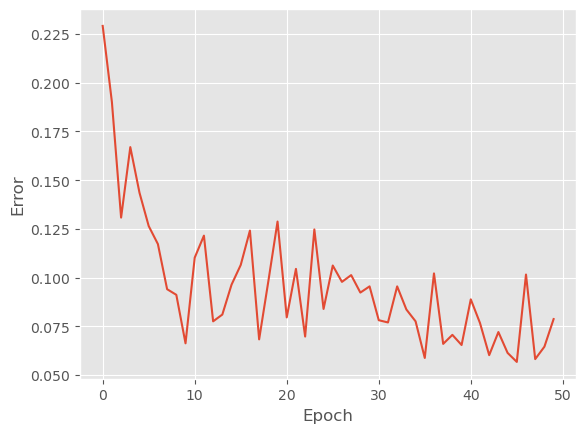

In [105]:
epochs = 50
batchsize = 500
errors = []
weights = []
K=1
alpha = 0.1
#creating datasets
train_ds = \
    tf.data.Dataset.from_tensor_slices((np.float32(trX))).batch(batchsize)
v0_state=v0
for epoch in range(epochs):
    batch_number = 0
    for batch_x in train_ds:
        for i_sample in range(len(batch_x)):           
            for k in range(K):
                v0_state = batch_x[i_sample]
                h0_state = hidden_layer(v0_state, W, hb)
                v1_state = reconstructed_output(h0_state, W, vb)
                h1_state = hidden_layer(v1_state, W, hb)
                delta_W = tf.matmul(tf.transpose([v0_state]), h0_state) - tf.matmul(tf.transpose([v1_state]), h1_state)
                W = W + alpha * delta_W
                vb = vb + alpha * tf.reduce_mean(v0_state - v1_state, 0)
                hb = hb + alpha * tf.reduce_mean(h0_state - h1_state, 0) 
                v0_state = v1_state
            if i_sample == len(batch_x)-1:
                err = error(batch_x[i_sample], v1_state)
                errors.append(err)
                weights.append(W)
                print ( 'Epoch: %d' % (epoch + 1), 
                       "batch #: %i " % batch_number, "of %i" % (len(trX)/batchsize), 
                       "sample #: %i" % i_sample,
                       'reconstruction error: %f' % err)
        batch_number += 1
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

### Recommendation
We can now predict movies that an arbitrarily selected user might like. This can be accomplished by feeding in the user's watched movie preferences into the RBM and then reconstructing the input. The values that the RBM gives us will attempt to estimate the user's preferences for movies that he hasn't watched based on the preferences of the users that the RBM was trained on.

Lets first select a User ID of our mock user:

In [106]:
mock_user_id = 6

In [107]:
#Selecting the input user
inputUser = trX[mock_user_id-1].reshape(1, -1)
inputUser = tf.convert_to_tensor(trX[mock_user_id-1],"float32")
v0 = inputUser
print(v0)
v0.shape

tf.Tensor(
[0.  0.  0.6 0.  0.  0.  0.6 0.6 0.  0.  0.  0.6 0.  0.  0.6 0.  0.  0.6
 0.  0.6 0.  0.  0.  0.  0.  0.  0.6 0.  0.  0.  0.  0.  0.  0.  0.6 0.6
 0.6 0.  0.  0.  0.6 0.  0.  0.  0.  0.  0.  0.6 0.  0.  0.6 0.  0.  0.6
 0.  0.  0.  0.  0.6 0.6 0.6 0.  0.  0.6 0.  0.6 0.  0.  0.6 0.  0.  0.
 0.  0.  0.6 0.  0.  0.  0.6 0.  0.6 0.  0.6 0.  0.  0.  0.  0.6 0.  0.
 0.6 0.  0.  0.6 0.6 0.  0.  0.  0.6 0.  0.6 0.6 0.  0.  0.6 0.6 0.  0.6
 0.6 0.  0.  0.  0.  0.  0.6 0.  0.  0.  0.  0.  0.6 0.  0.  0.  0.  0.
 0.6 0.  0.  0.  0.  0.6 0.6 0.  0.  0.6 0.  0.  0.  0.  0.  0.  0.6 0.
 0.  0.  0.6 0.6 0.  0.  0.  0.  0.6 0.  0.6 0.  0.6 0.6 0.  0.  0.  0.6
 0.  0.  0.6 0.  0.  0.  0.6 0.6 0.  0.  0.6 0.  0.  0.  0.  0.6 0.  0.6
 0.  0.  0.  0.  0.6 0.  0.  0.  0.  0.6 0.  0.  0.  0.6 0.  0.  0.  0.
 0.  0.  0.6 0.  0.6 0.  0.6 0.  0.  0.  0.  0.  0.  0.6 0.  0.  0.  0.6
 0.  0.6 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.6 0.  0.6 0.6 0.6 0.  0.
 0.6 0.6 0.  0.  0.  0.  0.6 0.  0.6 0.  0.  0

TensorShape([691])

In [108]:
v0test = tf.zeros([visibleUnits], tf.float32)
v0test.shape

TensorShape([691])

In [109]:
#Feeding in the user and reconstructing the input

hh0 = tf.nn.sigmoid(tf.matmul([v0], W) + hb)
vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + vb)
rec = vv1

tf.maximum(rec,1)
for i in vv1:
    print(i)

tf.Tensor(
[0.19857621 0.28185007 0.36927944 0.38336077 0.24689105 0.33731285
 0.16311575 0.28185436 0.17722878 0.3880937  0.23232393 0.44142872
 0.11555791 0.41208625 0.3928472  0.3928547  0.26206204 0.39285636
 0.31533182 0.2859235  0.41208377 0.2082942  0.3284373  0.623535
 0.32842606 0.09152577 0.20177247 0.35085127 0.20829378 0.4169403
 0.18016513 0.3328579  0.3928493  0.25440538 0.22877972 0.30253136
 0.29415762 0.44143477 0.32842794 0.23591304 0.2468881  0.2900207
 0.31103143 0.48616454 0.5161516  0.2900246  0.13762283 0.6466968
 0.19857188 0.20829411 0.43650678 0.39285654 0.4315964  0.26206493
 0.2818626  0.35085282 0.5111584  0.31103638 0.40243837 0.3833606
 0.4072464  0.18313943 0.32842875 0.28592086 0.43159807 0.3110383
 0.16864677 0.3373122  0.47618395 0.38809755 0.6282159  0.36928064
 0.21836327 0.21496584 0.2818517  0.22877012 0.40725395 0.2859171
 0.5111609  0.21496524 0.27782956 0.30676457 0.3833603  0.2778298
 0.2900271  0.4024371  0.19228736 0.33731124 0.45131382 0.42

We can then list the 20 most recommended movies for our mock user by sorting it by their scores given by our model.

In [110]:
scored_products_df_mock = products[products['Id'].isin(user_rating_df.columns)]
scored_products_df_mock = scored_products_df_mock.assign(RecommendationScore = rec[0])
scored_products_df_mock.sort_values(["RecommendationScore"], ascending=False).head(20)

,Id,Name,UnitPrice,RecommendationScore
476,477,Diamond Necklace 1/3 ct tw Round-cut 14K Yello...,699.00,0.711880
451,452,Starfish Necklace Diamond Accents 10K Yellow Gold,249.00,0.690950
187,188,Chuối Ngự - Nam Định,1.20,0.686660
317,318,Le Vian Aquaprase & Diamond Ring 1/3 ct tw 14K...,3299.99,0.677987
47,48,Lightstick BLACKPINK,20.00,0.646697
70,71,Hộp bã mía,1.00,0.628216
244,245,Diamond Promise Ring 1/6 ct tw Round-cut 10K Y...,429.00,0.628215
338,339,Cultured Pearl Ring 1/15 ct tw Diamonds Sterli...,2499.99,0.628205
23,24,Nike Floral Roshe Customized Running Shoes,40.00,0.623535
640,641,Vans UltraRange EXO Lace Up Sneaker,91.00,0.618833


Now, we can find all the movies that our mock user has watched before:

In [111]:
products_df_mock = ratings[ratings['CustomerID'] == mock_user_id]
products_df_mock.head()

,CustomerID,ProductID,Rate
55,6,258,1
133,6,424,1
324,6,539,1
521,6,422,1
757,6,590,1


### Neighborhood-based Models

In [112]:
from surprise import Dataset
from surprise import accuracy
from surprise import Reader

from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV

In [113]:
product_customers=ratings.pivot_table(values='Rate', index='CustomerID', columns='ProductID', fill_value=0)
product_customers.head()

ProductID,1,2,3,4,5,6,7,8,9,10,...,682,683,684,685,686,687,688,689,690,691
CustomerID,,,,,,,,,,,,,,,,,,,,,
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
13874,5.0,0.0,5.0,0.0,4.0,0.0,0.0,3.0,5.0,5.0,...,3.5,4.0,4.0,0.0,5.0,0.0,0.0,4.0,3.0,5.0
13879,0.0,3.5,2.0,0.0,2.0,0.0,0.0,0.0,0.0,3.5,...,5.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
13885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,...,4.0,0.0,4.0,4.0,4.0,0.0,0.0,4.0,0.0,4.0


In [114]:
mat_product_customers=csr_matrix(product_customers.values)

In [115]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings,reader)

In [116]:
#Splitting the dataset
trainset, testset = train_test_split(data, test_size=0.2,random_state=10)

In [117]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [118]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [119]:
test_pred

[Prediction(uid=103678, iid=289, r_ui=4.0, est=4.731377494823523, details={'actual_k': 5, 'was_impossible': False}),
 Prediction(uid=103699, iid=615, r_ui=5.0, est=4.396419279342433, details={'actual_k': 5, 'was_impossible': False}),
 Prediction(uid=103774, iid=330, r_ui=4.0, est=3.8267724155384415, details={'actual_k': 5, 'was_impossible': False}),
 Prediction(uid=103308, iid=202, r_ui=5.0, est=5, details={'actual_k': 5, 'was_impossible': False}),
 Prediction(uid=103713, iid=171, r_ui=1.0, est=1.0862129531341984, details={'actual_k': 5, 'was_impossible': False}),
 Prediction(uid=103784, iid=37, r_ui=4.0, est=4.008956688440383, details={'actual_k': 5, 'was_impossible': False}),
 Prediction(uid=6, iid=117, r_ui=1.0, est=1.018200847354993, details={'actual_k': 5, 'was_impossible': False}),
 Prediction(uid=103768, iid=148, r_ui=3.0, est=3.4214552139390113, details={'actual_k': 5, 'was_impossible': False}),
 Prediction(uid=103854, iid=446, r_ui=2.0, est=1.7773568042834968, details={'actual

In [120]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)
accuracy.mse(test_pred, verbose=True)
accuracy.mae(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.3903
MSE: 1.9328
MAE:  0.9708


0.9707950036412544

### Singular Value Decomposition(SVD)

In [122]:
from surprise import Dataset, Reader, SVD
from surprise.accuracy import rmse, mae

In [123]:
# Assuming you have a DataFrame 'ratings_df' with columns: 'user_id', 'item_id', and 'rating'

# Create a Surprise Dataset and Reader
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['CustomerID', 'ProductID', 'Rate']], reader)
data

In [124]:
# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [125]:
# Create and train the SVD model
model = SVD()
model.fit(trainset)

In [126]:
# Get the predictions for the test set
predictions = model.test(testset)

In [127]:
# Calculate RMSE
rmse_score = rmse(predictions)
print("RMSE:", rmse_score)

RMSE: 1.2128
RMSE: 1.212847326682842


In [128]:
# Calculate MSE
mse_score = rmse_score ** 2
print("MSE:", mse_score)

MSE: 1.4709986378417161


In [129]:
# Calculate RMSE
mae_score = mae(predictions)
print("MAE:", mae_score)

MAE:  0.8625
MAE: 0.8624698708255402


In [130]:
# Function to get top-N recommended items for a given user
def get_top_n_recommendations(user_id, n=5):
    # Get a list of all item IDs
    all_item_ids = ratings['ProductID'].unique()
    # Get the ratings given by the user (if any) to the items in the dataset
    user_ratings = ratings[ratings['CustomerID'] == user_id][['ProductID', 'Rate']]
    # Create a set of items already rated by the user
    rated_items = set(user_ratings['ProductID'])
    # Get the item IDs for items that the user has not rated
    unrated_items = [item_id for item_id in all_item_ids if item_id not in rated_items]
    # Create a list of (item_id, predicted_rating) tuples for unrated items
    unrated_predictions = [(item_id, model.predict(user_id, item_id).est) for item_id in unrated_items]
    # Sort the list based on predicted ratings in descending order
    unrated_predictions.sort(key=lambda x: x[1], reverse=True)
    # Get the top-N recommended items
    top_n_items = [item_id for item_id, _ in unrated_predictions[:n]]

    return top_n_items


In [131]:
import random  # Don't forget to import the 'random' module


# Example: Get top 5 recommended items for a random user
random_user = random.choice(ratings['CustomerID'].unique())
recommended_items = get_top_n_recommendations(random_user, n=5)
print("Recommended items for User", random_user, ":", recommended_items)

Recommended items for User 103441 : [678, 580, 172, 315, 549]


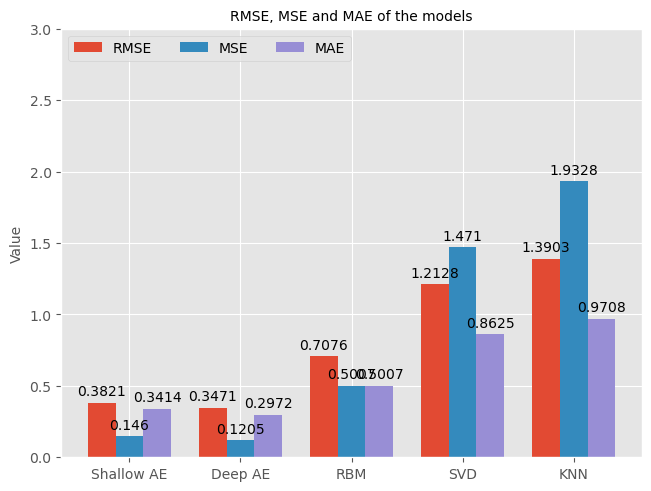

In [149]:
model = ("Shallow AE","Deep AE",'RBM', 'SVD', 'KNN')
evaluation = {
    'RMSE': (0.3821 ,0.3471 ,0.7076,1.2128,1.3903),
    'MSE': (0.1460,0.1205 , 0.5007,1.4710,1.9328),
    'MAE': (0.3414,0.2972 , 0.5007,0.8625,0.9708),
}

x = np.arange(len(model))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(layout='constrained')
for attribute, measurement in evaluation.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value', fontsize=10)
ax.set_title('RMSE, MSE and MAE of the models', fontsize=10)
ax.set_xticks(x + width, model, fontsize=10)
ax.legend(loc='upper left', ncols=3, fontsize=10)
ax.set_ylim(0, 3)

plt.show()

In [3]:
All_Beauty = pd.read_json(r'C:\Users\Chidera\Documents\data\All_Beauty.json', lines=True)
print(All_Beauty.shape)
All_Beauty.head(10)

(371345, 12)


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1,True,"02 19, 2015",A1V6B6TNIC10QE,0143026860,theodore j bigham,great,One Star,1424304000,NaN,NaN,NaN
1,4,True,"12 18, 2014",A2F5GHSXFQ0W6J,0143026860,Mary K. Byke,My husband wanted to reading about the Negro ...,... to reading about the Negro Baseball and th...,1418860800,NaN,NaN,NaN
2,4,True,"08 10, 2014",A1572GUYS7DGSR,0143026860,David G,"This book was very informative, covering all a...",Worth the Read,1407628800,NaN,NaN,NaN
3,5,True,"03 11, 2013",A1PSGLFK1NSVO,0143026860,TamB,I am already a baseball fan and knew a bit abo...,Good Read,1362960000,NaN,NaN,NaN
4,5,True,"12 25, 2011",A6IKXKZMTKGSC,0143026860,shoecanary,This was a good story of the Black leagues. I ...,"More than facts, a good story read!",1324771200,5,NaN,NaN
5,5,False,"02 26, 2010",A36NF437WZLQ9E,0143026860,W. Powell,Today I gave a book about the Negro Leagues of...,The Gift of Black Baseball,1267142400,4,NaN,NaN
6,4,False,"03 7, 2001",A10Q8NIFOVOHFV,0143026860,Robert S. Clay Jr.,The story of race relations in American histor...,"Baseball, America, and racism.",983923200,14,NaN,NaN
7,1,True,"04 10, 2017",A26PO1B2Q2G1CS,014789302X,Jacqueline Diaz,I didn't like this product it smudged all unde...,One Star,1491782400,NaN,NaN,NaN
8,5,True,"01 3, 2017",AQ812VYVTC2RJ,014789302X,Khadijah Ali-Evans,I simply love the product. I appreciate print ...,Five Stars,1483401600,NaN,NaN,NaN
9,1,True,"11 19, 2016",AMACNEW14ADMX,014789302X,rabiyaa123,it burns your eyes when u put it on and very ...,i do not recommend.,1479513600,3,NaN,NaN


In [4]:
Gift_Cards = pd.read_json(r'C:\Users\Chidera\Documents\data\Gift_Cards.json', lines=True)
print(Gift_Cards.shape)
Gift_Cards.head(10)

(147194, 12)


,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,1,25,False,"12 19, 2008",APV13CM0919JD,B001GXRQW0,{'Gift Amount:': ' 50'},LEH,"Amazon,\nI am shopping for Amazon.com gift car...",Merry Christmas.,1229644800,NaN
1,5,NaN,False,"12 17, 2008",A3G8U1G1V082SN,B001GXRQW0,{'Gift Amount:': ' 50'},Tali,"I got this gift card from a friend, and it was...",Gift card with best selection,1229472000,NaN
2,5,4,False,"12 17, 2008",A11T2Q0EVTUWP,B001GXRQW0,{'Gift Amount:': ' 50'},Z,aren't we going to save trees?! :) People who ...,A convenient and great gift for the environmen...,1229472000,NaN
3,5,NaN,False,"12 17, 2008",A9YKGBH3SV22C,B001GXRQW0,{'Gift Amount:': ' 25'},Giotravels,You can always get someone something from Amaz...,Totally make sense,1229472000,NaN
4,1,NaN,True,"12 17, 2008",A34WZIHVF3OKOL,B001GXRQW0,NaN,King Dad,Why take 50 dollars of good money with no limi...,Give CASH!,1229472000,NaN
5,3,146,False,"12 16, 2008",A221J8EC5HNPY6,B001GXRQW0,{'Gift Amount:': ' 25'},D. Daniels,Gift Cards are the truly personal gift. My on...,Great Gift but only if it works!,1229385600,NaN
6,1,577,True,"12 14, 2008",A204VFHD6JWASO,B001GXRQW0,{'Gift Amount:': ' 50'},C. Michael Gamble,"I am a dedicated Amazon.com shopper, and, am a...",Prime Members BEWARE,1229212800,NaN
7,1,452,True,"12 11, 2008",A3QN3GMNS7NBIQ,B001GXRQW0,{'Gift Amount:': ' 50'},MjSher,"Bought three $50 gift cards as gifts, received...",Horrible experience,1228953600,NaN
8,5,3,False,"12 10, 2008",A1BXZIDZOMBAV2,B001GXRQW0,{'Gift Amount:': ' 50'},D. Magilnick,At this time of year Amazon gift cards are tur...,These are great gifts.,1228867200,NaN
9,1,45,True,"12 6, 2008",AJ7D8N3Z1Q7MK,B001GXRQW0,{'Gift Amount:': ' 50'},P. Chung,I bought 8 gift cards to give out as presents....,"They are sealed in the envelopes, cannot sign ...",1228521600,NaN


In [5]:
mag_sub = pd.read_json(r'C:\Users\Chidera\Documents\data\Magazine_Subscriptions.json', lines=True)
print(mag_sub.shape)
mag_sub.head(10)

(89689, 12)


,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,5,9,False,"11 8, 2001",AH2IFH762VY5U,B00005N7P0,ted sedlmayr,"for computer enthusiast, MaxPC is a welcome si...","AVID READER SINCE ""boot"" WAS THE NAME",1005177600,NaN,NaN
1,5,9,False,"10 31, 2001",AOSFI0JEYU4XM,B00005N7P0,Amazon Customer,Thank god this is not a Ziff Davis publication...,The straight scoop,1004486400,NaN,NaN
2,3,14,False,"03 24, 2007",A3JPFWKS83R49V,B00005N7OJ,Bryan Carey,Antiques Magazine is a publication made for an...,"Antiques Magazine is Good, but not for Everyone",1174694400,{'Format:': ' Print Magazine'},NaN
3,5,13,False,"11 10, 2006",A19FKU6JZQ2ECJ,B00005N7OJ,Patricia L. Porada,This beautiful magazine is in itself a work of...,THE DISCERNING READER,1163116800,{'Format:': ' Print Magazine'},NaN
4,5,NaN,True,"07 14, 2014",A25MDGOMZ2GALN,B00005N7P0,Alvey,A great read every issue.,Five Stars,1405296000,NaN,NaN
5,3,NaN,True,"06 24, 2014",A3XT9XXWXFMJ1,B00005N7P0,Jeff A Milne,This magazine was great for the times but as w...,Great While it lasted,1403568000,NaN,NaN
6,5,NaN,True,"06 1, 2014",A3ERU005ES1IHT,B00005N7P0,P. R THOMPSON,I've read Maximum PC (MPC) for many years. The...,For Both the Newbie and The Advanced PC User,1401580800,NaN,NaN
7,5,NaN,True,"05 15, 2014",AC2278WPK3EU,B00005N7P0,Earle Williams,We ordered this magazine for our grandson (the...,Great Gift,1400112000,NaN,NaN
8,4,NaN,True,"03 28, 2014",A3QRR8PSCBI07C,B00005N7P0,JJM,I have subscribed to the nook version for a fe...,Decent magazine at a good price,1395964800,NaN,NaN
9,4,NaN,True,"02 26, 2014",A5QQOOZJOVPSF,B00005N7P0,John L. Mehlmauer,"I'm old, and so is my computer. Any advice th...",Cheapskates guide,1393372800,NaN,NaN


In [6]:
# Concatenate the dataframes vertically
rating_df = pd.concat([mag_sub, All_Beauty,Gift_Cards], ignore_index=True)

In [7]:
print(rating_df.shape)
rating_df.head(10)

(608228, 12)


,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,5,9,False,"11 8, 2001",AH2IFH762VY5U,B00005N7P0,ted sedlmayr,"for computer enthusiast, MaxPC is a welcome si...","AVID READER SINCE ""boot"" WAS THE NAME",1005177600,NaN,NaN
1,5,9,False,"10 31, 2001",AOSFI0JEYU4XM,B00005N7P0,Amazon Customer,Thank god this is not a Ziff Davis publication...,The straight scoop,1004486400,NaN,NaN
2,3,14,False,"03 24, 2007",A3JPFWKS83R49V,B00005N7OJ,Bryan Carey,Antiques Magazine is a publication made for an...,"Antiques Magazine is Good, but not for Everyone",1174694400,{'Format:': ' Print Magazine'},NaN
3,5,13,False,"11 10, 2006",A19FKU6JZQ2ECJ,B00005N7OJ,Patricia L. Porada,This beautiful magazine is in itself a work of...,THE DISCERNING READER,1163116800,{'Format:': ' Print Magazine'},NaN
4,5,NaN,True,"07 14, 2014",A25MDGOMZ2GALN,B00005N7P0,Alvey,A great read every issue.,Five Stars,1405296000,NaN,NaN
5,3,NaN,True,"06 24, 2014",A3XT9XXWXFMJ1,B00005N7P0,Jeff A Milne,This magazine was great for the times but as w...,Great While it lasted,1403568000,NaN,NaN
6,5,NaN,True,"06 1, 2014",A3ERU005ES1IHT,B00005N7P0,P. R THOMPSON,I've read Maximum PC (MPC) for many years. The...,For Both the Newbie and The Advanced PC User,1401580800,NaN,NaN
7,5,NaN,True,"05 15, 2014",AC2278WPK3EU,B00005N7P0,Earle Williams,We ordered this magazine for our grandson (the...,Great Gift,1400112000,NaN,NaN
8,4,NaN,True,"03 28, 2014",A3QRR8PSCBI07C,B00005N7P0,JJM,I have subscribed to the nook version for a fe...,Decent magazine at a good price,1395964800,NaN,NaN
9,4,NaN,True,"02 26, 2014",A5QQOOZJOVPSF,B00005N7P0,John L. Mehlmauer,"I'm old, and so is my computer. Any advice th...",Cheapskates guide,1393372800,NaN,NaN


In [8]:
rating_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608228 entries, 0 to 608227
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         608228 non-null  int64 
 1   vote            82343 non-null   object
 2   verified        608228 non-null  bool  
 3   reviewTime      608228 non-null  object
 4   reviewerID      608228 non-null  object
 5   asin            608228 non-null  object
 6   reviewerName    608184 non-null  object
 7   reviewText      607637 non-null  object
 8   summary         607963 non-null  object
 9   unixReviewTime  608228 non-null  int64 
 10  style           219731 non-null  object
 11  image           8932 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 51.6+ MB


In [9]:
rating_df.drop(["verified","reviewerName","reviewText","summary","unixReviewTime","vote","style",
         "image"], axis = 1, inplace=True)
rating_df

,overall,reviewTime,reviewerID,asin
0,5,"11 8, 2001",AH2IFH762VY5U,B00005N7P0
1,5,"10 31, 2001",AOSFI0JEYU4XM,B00005N7P0
2,3,"03 24, 2007",A3JPFWKS83R49V,B00005N7OJ
3,5,"11 10, 2006",A19FKU6JZQ2ECJ,B00005N7OJ
4,5,"07 14, 2014",A25MDGOMZ2GALN,B00005N7P0
...,...,...,...,...
608223,5,"09 15, 2018",A2K9WVQW9TLWNK,B01H5PPJT4
608224,4,"09 7, 2018",A149ALSR6TPGF7,B01H5PPJT4
608225,5,"08 29, 2018",A2Q066NZCQSCOR,B01H5PPJT4
608226,5,"08 18, 2018",A1KJLWCW7XBS8I,B01H5PPJT4


In [10]:
rating_df.rename(columns={
        'overall': 'Rate','reviewTime': 'CreateDate','reviewerID': 'CustomerID','asin': 'ProductID'
    }, inplace=True)

In [11]:
rating_df

,Rate,CreateDate,CustomerID,ProductID
0,5,"11 8, 2001",AH2IFH762VY5U,B00005N7P0
1,5,"10 31, 2001",AOSFI0JEYU4XM,B00005N7P0
2,3,"03 24, 2007",A3JPFWKS83R49V,B00005N7OJ
3,5,"11 10, 2006",A19FKU6JZQ2ECJ,B00005N7OJ
4,5,"07 14, 2014",A25MDGOMZ2GALN,B00005N7P0
...,...,...,...,...
608223,5,"09 15, 2018",A2K9WVQW9TLWNK,B01H5PPJT4
608224,4,"09 7, 2018",A149ALSR6TPGF7,B01H5PPJT4
608225,5,"08 29, 2018",A2Q066NZCQSCOR,B01H5PPJT4
608226,5,"08 18, 2018",A1KJLWCW7XBS8I,B01H5PPJT4


In [12]:
rating_df.drop(['CreateDate'], axis=1,inplace=True)

In [13]:
n_users = rating_df.CustomerID.unique().shape[0]
n_products = rating_df.ProductID.unique().shape[0]
n_ratings = len(rating_df)
avg_ratings_per_user = n_ratings/n_users

print('Number of unique users: ', n_users)
print('Number of unique products: ', n_products)
print('Number of total ratings: ', n_ratings)
print('Average number of ratings per user: ', avg_ratings_per_user)

Number of unique users:  515506
Number of unique products:  36562
Number of total ratings:  608228
Average number of ratings per user:  1.1798659957401079


In [14]:
productIndex = rating_df.groupby("ProductID").count().sort_values(by= \
                "Rate",ascending=False)[0:100].index
ratingDFX3 = rating_df[rating_df.ProductID.isin(productIndex)]
ratingDFX3.count()

Rate          164763
CustomerID    164763
ProductID     164763
dtype: int64

In [12]:
userIndex = ratingDFX2.groupby("CustomerID").count().sort_values(by= \
    "Rate",ascending=False).sample(n=1000, random_state=2018).index
ratingDFX3 = ratingDFX2[ratingDFX2.CustomerID.isin(userIndex)]
ratingDFX3.count()

Rate          1217
CustomerID    1217
ProductID     1217
dtype: int64

In [15]:
products = ratingDFX3.ProductID.unique()
productDF = pd.DataFrame(data=products,columns=['originalProductID'])
productDF['newProductID'] = productDF.index+1

users = ratingDFX3.CustomerID.unique()
usersDF = pd.DataFrame(data=users,columns=['originalCustomerID'])
usersDF['newCustomerID'] = usersDF.index+1

ratingDFX3 = ratingDFX3.merge(productDF,left_on='ProductID', \
                              right_on='originalProductID')
ratingDFX3.drop(labels='originalProductID', axis=1, inplace=True)

ratingDFX3 = ratingDFX3.merge(usersDF,left_on='CustomerID', \
                              right_on='originalCustomerID')
ratingDFX3.drop(labels='originalCustomerID', axis=1, inplace=True)

In [16]:
n_users = ratingDFX3.CustomerID.unique().shape[0]
n_products = ratingDFX3.ProductID.unique().shape[0]
n_ratings = len(ratingDFX3)
avg_ratings_per_user = n_ratings/n_users

print('Number of unique users: ', n_users)
print('Number of unique products: ', n_products)
print('Number of total ratings: ', n_ratings)
print('Average number of ratings per user: ', avg_ratings_per_user)

Number of unique users:  138312
Number of unique products:  100
Number of total ratings:  164763
Average number of ratings per user:  1.1912415408641333


In [17]:
print(ratingDFX3)

        Rate      CustomerID   ProductID  newProductID  newCustomerID
0          5  A38PH87F2DLJ6S  B00005N7Q1             1              1
1          5  A3556UAMASCD0B  B00005N7Q1             1              2
2          4  A1RO4VUZRWN5AD  B00005N7Q1             1              3
3          4  A38GVPHBWCYKBT  B00005N7Q1             1              4
4          5  A1LPAB56PI3B1X  B00005N7Q1             1              5
...      ...             ...         ...           ...            ...
164758     5  A3M82KM0JDLF5D  B01E4QUN0W           100         138308
164759     5  A16YO52DUQ94CO  B01E4QUN0W           100         138309
164760     5   AXKCGBO23LZIS  B01E4QUN0W           100         138310
164761     5  A1B9U1WG8JOX8M  B01E4QUN0W           100         138311
164762     5  A3EA5JDHLON9C4  B01E4QUN0W           100         138312

[164763 rows x 5 columns]


In [18]:
ratings = ratingDFX3